In [1]:
# Basic setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Loading data into workspace

In [2]:
customers =  pd.read_csv('customer_data.csv', header = 0)
orders = pd.read_csv('orders_data.csv', header = 0)
payments = pd.read_csv('payments_data.csv', header = 0)
transactions = pd.read_csv('transaction.csv', header = 0)

In [3]:
customers.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [4]:
orders.head()

,customerEmail,orderAmount,orderId,orderShippingAddress,orderState
0,josephhoward@yahoo.com,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending
1,josephhoward@yahoo.com,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled
2,josephhoward@yahoo.com,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending
3,josephhoward@yahoo.com,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled
4,evansjeffery@yahoo.com,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled


In [5]:
payments.shape

(342, 6)

In [11]:
transactions.head()

,customerEmail,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId
0,josephhoward@yahoo.com,vjbdvd,wt07xm68b,18,False,a9lcj51r
1,josephhoward@yahoo.com,yp6x27,wt07xm68b,26,False,y4wcv03i
2,evansjeffery@yahoo.com,nlghpa,41ug157xz,45,False,5mi94sfw
3,evansjeffery@yahoo.com,uw0eeb,41ug157xz,23,False,br8ba1nu
4,evansjeffery@yahoo.com,bn44oh,y3xp697jx,43,True,a33145ss


In [12]:
o_p = pd.merge(orders, transactions, on=["customerEmail", "orderId"])# megring orders  with transactions
o_t_p = pd.merge(o_p, payments, on="customerEmail") # merging the above result with payments

In [13]:
o_t_p  = o_t_p.drop_duplicates(subset="transactionId")

In [14]:
full_data = pd.merge(customers, o_t_p, on=["customerEmail"])

In [15]:
full_data = full_data.drop_duplicates(subset = "transactionId")

In [16]:
full_data["fraudulent"].value_counts()

False    366
True     257
Name: fraudulent, dtype: int64

In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 818
Data columns (total 19 columns):
fraudulent                          623 non-null bool
customerEmail                       623 non-null object
customerPhone                       623 non-null object
customerDevice                      623 non-null object
customerIPAddress                   623 non-null object
customerBillingAddress              623 non-null object
orderAmount                         623 non-null int64
orderId                             623 non-null object
orderShippingAddress                623 non-null object
orderState                          623 non-null object
paymentMethodId_x                   623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null bool
transactionId                       623 non-null object
paymentMethodId_y                   623 non-null object
paymentMethodIssuer                 623 non-null object
payme

In [18]:
full_data.describe()

,orderAmount,transactionAmount
count,623.000000,623.000000
mean,34.598716,34.598716
std,20.360247,20.360247
min,10.000000,10.000000
25%,21.000000,21.000000
50%,34.000000,34.000000
75%,45.000000,45.000000
max,353.000000,353.000000


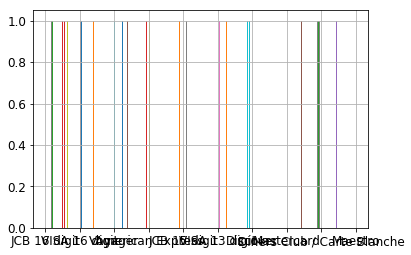

In [22]:
full_data["paymentMethodProvider"].hist()

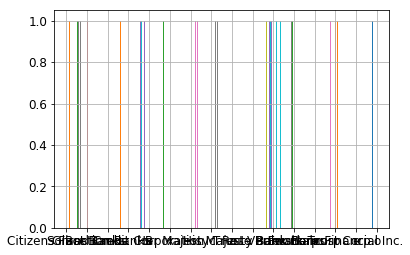

In [20]:
full_data["paymentMethodIssuer"].hist()

### The distribution is different for the payment methods, transaction methods from plotting

In [23]:
full_data.tail()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderAmount,orderId,orderShippingAddress,orderState,paymentMethodId_x,transactionAmount,transactionFailed,transactionId,paymentMethodId_y,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
814,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,True,7yilsi1o,f0xnu5om9,His Majesty Bank Corp.,JCB 16 digit,False,card
815,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,25,True,wmh52bns,f0xnu5om9,His Majesty Bank Corp.,JCB 16 digit,False,card
816,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,False,c82k5bcv,f0xnu5om9,His Majesty Bank Corp.,JCB 16 digit,False,card
817,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",19,p0gdbf,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,19,False,xdw33hfp,f0xnu5om9,His Majesty Bank Corp.,JCB 16 digit,False,card
818,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",27,5lmvrj,"539 Branch Shore\nLake Roy, IA 11884",fulfilled,f0xnu5om9,27,False,wgmajf82,f0xnu5om9,His Majesty Bank Corp.,JCB 16 digit,False,card


In [24]:
full_data.shape

(623, 19)

In [25]:
full_data.columns

Index(['fraudulent', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'orderAmount', 'orderId',
       'orderShippingAddress', 'orderState', 'paymentMethodId_x',
       'transactionAmount', 'transactionFailed', 'transactionId',
       'paymentMethodId_y', 'paymentMethodIssuer', 'paymentMethodProvider',
       'paymentMethodRegistrationFailure', 'paymentMethodType'],
      dtype='object')

### From the above dataset we can see that there is good depth of knowledge in the data and Cannot add all the columns in to our analysis

## omiting data
-----
* customer details analysis like the correlation b/w place of the customer and the fraudlent users
* Ip address is far fetched
* Order ID
* order state
* shipping address
* transactionId
* Transactoin amount
* paymentMethodId_y
* paymentMethodId_x



In [26]:
relevant_data = full_data[['fraudulent', 'orderAmount','orderState', 'transactionFailed','paymentMethodRegistrationFailure','paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer']]

In [27]:
# Encoding the data into numbers from objects.. 

In [28]:
relevant_data.paymentMethodIssuer.value_counts()

Her Majesty Trust           88
His Majesty Bank Corp.      85
Bastion Banks               73
Citizens First Banks        57
Grand Credit Corporation    52
Bulwark Trust Corp.         48
Fountain Financial Inc.     46
Vertex Bancorp              45
Rose Bancshares             44
Solace Banks                42
B                           20
c                           10
e                            6
a                            4
x                            2
o                            1
Name: paymentMethodIssuer, dtype: int64

In [34]:
relevant_data.head()

,fraudulent,orderAmount,orderState,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,18,2,0,1,card,JCB 16 digit,Citizens First Banks
1,0,26,1,0,1,card,JCB 16 digit,Citizens First Banks
2,1,45,1,0,1,bitcoin,VISA 16 digit,Solace Banks
3,1,23,1,0,1,bitcoin,VISA 16 digit,Solace Banks
4,1,43,1,1,1,bitcoin,VISA 16 digit,Solace Banks


In [35]:
# Columns for label encoding
"""
fradulent, orderstate, transactionFailed, paymentMethodRegistrationFailure
"""

# Columns for one-hot encoding 
"""

paymentMethodType, paymentMethodProvider,paymentMethodIssuer

"""
from sklearn import preprocessing

In [36]:
le = preprocessing.LabelEncoder()
relevant_data.fraudulent = le.fit_transform(relevant_data.fraudulent)
relevant_data.orderState = le.fit_transform(relevant_data.orderState)
relevant_data.transactionFailed = le.fit_transform(relevant_data.transactionFailed)
relevant_data.paymentMethodRegistrationFailure = le.fit_transform(relevant_data.paymentMethodRegistrationFailure)

C:\Users\welcome\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
relevant_data.head()

,fraudulent,orderAmount,orderState,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,18,2,0,1,card,JCB 16 digit,Citizens First Banks
1,0,26,1,0,1,card,JCB 16 digit,Citizens First Banks
2,1,45,1,0,1,bitcoin,VISA 16 digit,Solace Banks
3,1,23,1,0,1,bitcoin,VISA 16 digit,Solace Banks
4,1,43,1,1,1,bitcoin,VISA 16 digit,Solace Banks


In [39]:
oneHot = preprocessing.OneHotEncoder(sparse=False)
paymentMethodType = le.fit_transform(relevant_data.paymentMethodType)
# paymentMethodType = array(paymentMethodType)
paymentMethodProvider = le.fit_transform(relevant_data.paymentMethodProvider)
# paymentMethodProvider = array(paymentMethodProvider)
paymentMethodIssuer = le.fit_transform(relevant_data.paymentMethodIssuer)
# paymentMethodIssuer = array(paymentMethodIssuer)
encoded_paymentMethodType = oneHot.fit_transform(paymentMethodType.reshape(len(paymentMethodType), 1))
encoded_paymentMethodProvider = oneHot.fit_transform(paymentMethodProvider.reshape(len(paymentMethodProvider), 1))
encoded_paymentMethodIssuer = oneHot.fit_transform(paymentMethodIssuer.reshape(len(paymentMethodIssuer), 1))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [40]:
relevant_data = relevant_data[["fraudulent","orderAmount","orderState","transactionFailed","paymentMethodRegistrationFailure"]]

In [41]:
relevant_data.shape

(623, 5)

In [42]:
relevant_data = relevant_data.reset_index()

In [43]:
paymentMethodType_df = pd.DataFrame(encoded_paymentMethodType, columns = ["paymentType%d" % (i + 1) for i in range(4)]) # from shape of the array
paymentMethodProvider_df =  pd.DataFrame(encoded_paymentMethodProvider, columns = ["paymentprovider%d" % (i + 1) for i in range(10)]) # from shape of array
paymentMethodIssuer_df = pd.DataFrame(encoded_paymentMethodIssuer, columns = ["paymentissuer%d" % (i + 1) for i in range(16)]) # from shape of array

In [44]:
paymentMethodType_df = paymentMethodType_df.reset_index()
paymentMethodProvider_df = paymentMethodProvider_df.reset_index()
paymentMethodIssuer_df = paymentMethodIssuer_df.reset_index()

In [45]:
model_data = pd.merge(relevant_data, paymentMethodType_df, on = ['index'], validate = "one_to_one")
model_data = pd.merge(model_data, paymentMethodProvider_df, on = ['index'], validate = "one_to_one")
model_data = pd.merge(model_data, paymentMethodIssuer_df, on = ['index'], validate = "one_to_one")

In [46]:
del model_data['index']

## Splitting the data into test and train sets for the classifiers

In [47]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(model_data, test_size = 0.2,  random_state = 123 )

In [48]:
y_train = train_set['fraudulent']

In [49]:
del train_set['fraudulent']

In [50]:
X_train = train_set

In [51]:
y_test= test_set['fraudulent']
del test_set['fraudulent']
X_test = test_set

## Applying the Logistic regression to the Training data

In [52]:
# Classifier
# Logistics Regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
Logisitc_cm = confusion_matrix(y_test, y_pred)


In [55]:
Logisitc_cm

array([[43,  5],
       [13, 25]], dtype=int64)

### Naive Bayesian classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [58]:

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
Naive_Bayesian_cm = confusion_matrix(y_test, y_pred)


In [59]:
Naive_Bayesian_cm

array([[47,  1],
       [36,  2]], dtype=int64)

# Fitting SVM classifier to the Training set

In [60]:

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [61]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [62]:

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
SVM_classifier_cm= confusion_matrix(y_test, y_pred)

In [63]:
SVM_classifier_cm

array([[41,  7],
       [12, 26]], dtype=int64)

# Fitting Decision tree classifier to the Training set

In [64]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [65]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [66]:

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
Decision_tree_cm = confusion_matrix(y_test, y_pred)

In [67]:
Decision_tree_cm

array([[44,  4],
       [ 8, 30]], dtype=int64)

# Fitting Random Forest classifier to the Training set

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [70]:

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
Random_forest_cm = confusion_matrix(y_test, y_pred)


In [71]:
Random_forest_cm

array([[45,  3],
       [10, 28]], dtype=int64)

# Fitting KNN classifier to the training set

In [72]:

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [74]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred)

In [75]:
knn_cm

array([[41,  7],
       [16, 22]], dtype=int64)

# Fitting Kernel svm classifier

In [76]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [78]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
Kernel_svm_cm = confusion_matrix(y_test, y_pred)

In [79]:
Kernel_svm_cm

array([[48,  0],
       [25, 13]], dtype=int64)

# Conclusion

## Logistic regressor , Decision Tree classifier , Random Forest Clasifier

Have good fit for this data set

# ***Decision tree classifier is the best fit model for this problem.***

### further improvements to this model 
* Adding paymentMethodId and encoding them into the model
* Looking for the location based analysis